# Task 1: (50 points)

## Salary Prediction with Linear Regression

In this coding exercise, we'll delve into building a predictive model for salary estimation using linear regression. The dataset locates in a CSV file, contains features that might influence an individual's salary, such as years of experience, education level, and job title. Our goal is to develop a linear regression model that accurately predicts salary based on these features.

### Exercise Overview and Implementation Steps

#### 1. Reading CSV File (5 Points)
We start by loading the dataset from a CSV file named 'salary.csv'. This file contains information about individuals' salaries and related features.

#### 2. Creating Features and Output (5 Points)
Next, we separate the dataset into features (X) and the target variable (y). The feature matrix, X, comprises all columns except 'Salary', while y represents the 'Salary' column. (hint: we only have the feature of experience in this csv file)

#### 3. Splitting Data into Training and Test Sets (5 Points)
To evaluate our model's performance, we divide the dataset into training and test sets. The training set will be used to train the model, while the test set will assess its predictive accuracy.

#### 4. Building a Linear Regression Model (10 Points)
We then initialize a linear regression model using scikit-learn's LinearRegression class. Linear regression is chosen as our predictive model due to its simplicity and interpretability. You can also write your own model by defining a customized model class. Here is an example of sklearn linear regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

#### 5. Training the Model (10 Points)
With the linear regression model instantiated, we train it using the training data (X_train, y_train) to learn the underlying relationships between features and salary.

#### 6. Printing Model Parameters (5 Points)
After training, we print the intercept and coefficients of the linear regression model. These parameters provide insights into how each feature contributes to predicting salary.

#### 7. Predicting Output for Test Data (3 Points)
Using the trained model, we predict the salaries for the test data (x_test).

#### 8. Printing Model Score and Mean Squared Error (4 Points)
We evaluate the model's performance by calculating its score and mean squared error (MSE) on the test set. The score represents the coefficient of determination (R²), indicating how well the model fits the data, while MSE quantifies the prediction error. You can also try to use other metrics to evaluate your model.

#### 9. Showing a Scatter Plot (3 Points)
Finally, we visualize the actual versus predicted salaries using a scatter plot. This plot provides a graphical representation of the model's predictive performance.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# 01. read csv file (5 points)
file_path = 'D:\github\ML_assignment\ML\week5_LinearRegressionandNaiveBayes\\assignment/salary.csv'
data = pd.read_csv(file_path)
print(data.head())

   Experience  Salary
0         0.0    9534
1         0.1   11667
2         0.2   11015
3         0.3   10347
4         0.3   11110


In [4]:
# 02. create the feature x and the output y (5 points)
X = data[['Experience']]
y = data['Salary']

print(X.head())
print(y.head())

   Experience
0         0.0
1         0.1
2         0.2
3         0.3
4         0.3
0     9534
1    11667
2    11015
3    10347
4    11110
Name: Salary, dtype: int64


In [5]:
# 03. split data into training and test sets (5 points)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('train data:', X_train.shape, y_train.shape)
print('test data:', X_test.shape, y_test.shape)

train data: (80, 1) (80,)
test data: (20, 1) (20,)


In [7]:
# 04. build a linear regression model (10 points)
model = LinearRegression()

In [8]:
# 05. train the model (10 points) 
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# 06. print parameters of this linear regression (5 points)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 5590.380973096449
Coefficients: [4933.25454644]


In [10]:
# 07. predict the output for x_test (3 points)
y_pred = model.predict(X_test)
# 08. print the model score and mse (4 points)
r2 = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print('Model Score (R²):', r2)
print('Mean Squared Error(MSE):', mse)

Model Score (R²): 0.832620871253703
Mean Squared Error(MSE): 27852297.361686897


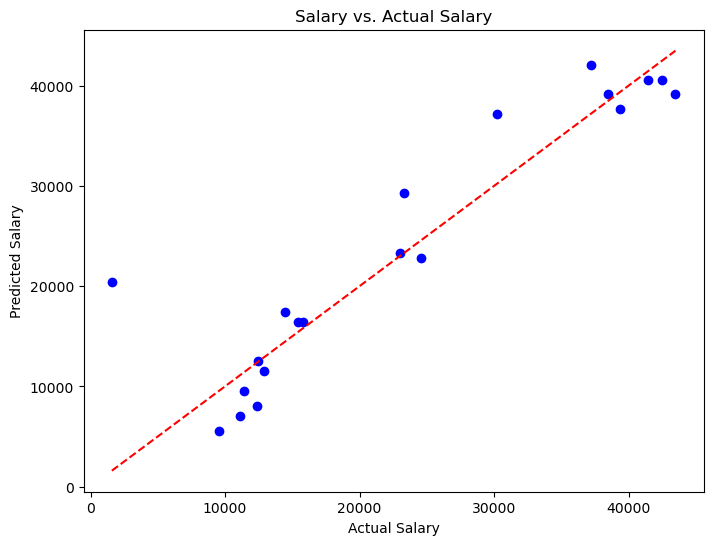

In [14]:
# 09. show a scatter plot (3 points)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Salary vs. Actual Salary')
plt.show()

# Task 2: (50 points) 

## Naive Bayes Classifier Exercise: Product Review Classification
In this programming exercise where you will apply the Naive Bayes classifier to classify product reviews. Each review has been labeled as either 'helpful' or 'not helpful'. Your task is to develop a model that predicts these labels based on the text of the reviews.

## Exercise Goals and Implementation Steps

### 1. Data Preprocessing
- **Task**: Clean and prepare the text data for classification.
- **Implementation steps**:
  - Convert all text to lowercase to ensure uniformity.
  - Remove punctuation to reduce noise and prevent it from affecting word recognition.
  - Filter out common stopwords to focus on more meaningful words in the text.

### 2. Naive Bayes Classification
- **Task**: Implement the Naive Bayes algorithm to classify the sentiment of reviews as either 'helpful' or 'not helpful'.
- **Implementation steps**:
  - Utilize the preprocessed data to train your Naive Bayes classifier. This involves calculating the prior probabilities for each class and the likelihood of each word within those classes using Laplace smoothing (def train).
  - Develop a function to apply these probabilities to new review data to predict classifications (def classify).

### 3. Model Evaluation
- **Task**: Evaluate the performance of your Naive Bayes model.
- **Implementation steps**:
  - Apply your classification function to a set of test reviews that were not used during the training phase.
  - Compare the predicted labels against the actual labels to determine the accuracy of your model.
  - Comment briefly on your model's performance.

These steps will guide you through the implementation of a text classification system using the Naive Bayes algorithm, starting from raw data processing to making predictions and evaluating their correctness.


In [29]:
# 10 points

import string

# Dataset for product reviews, each entry consists of a review and its label ("helpful" or "not helpful").
reviews_data = [
    ("Love this! Great purchase, fast delivery.", "helpful"),
    ("Not what I expected, poor quality material.", "not helpful"),
    ("Arrived on time, works perfectly. Would buy again!", "helpful"),
    ("Misleading description, not worth the price.", "not helpful"),
    ("Excellent product, just as described. I'm very satisfied.", "helpful"),
    ("Took too long to arrive. Disappointed with the service.", "not helpful"),
    ("Awesome quality! Fast shipping too.", "helpful"),
    ("One star, broke on the first day.", "not helpful"),
    ("Very helpful customer service, great deal.", "helpful"),
    ("Horrible, nothing like the picture.", "not helpful"),
    ("Definitely recommend it, works flawlessly.", "helpful"),
    ("Overpriced and underdelivers. Sad!", "not helpful"),
    ("Perfect for my needs, arrived promptly.", "helpful"),
    ("Terrible purchase, would not recommend.", "not helpful"),
    ("Happy with this purchase, came quickly and works well.", "helpful"),
    ("Doesn't match the description. Very misleading!", "not helpful"),
    ("Surprisingly good quality for the price, very pleased.", "helpful"),
    ("Waste of money, absolutely terrible.", "not helpful"),
    ("Delivered on time and very useful, I love it!", "helpful"),
    ("Nothing positive to say, avoid at all costs.", "not helpful")
]


def preprocess(review):
    # Define a set of stopwords. These are common words that are generally irrelevant in determining the sentiment or quality of a review.
    stopwords = {"a", "an", "and", "are", "as", "at", "be", "by", "for", "from", "has", "he", "in", "is", "it", "its", "of", "on", "that", "the", "to", "was", "were", "will", "with"}

    # write your solution here
    review = review.lower()
    review = review.translate(str.maketrans('', '', string.punctuation))
    splited_words = review.split()
    # Remove stopwords
    filtered_words = [word for word in splited_words if word not in stopwords]
    # Join the filtered words back into text
    words = ' '.join(filtered_words)
    return words

# Preprocess the reviews data
preprocessed_reviews = [(preprocess(review), label) for review, label in reviews_data]
#display the preprocessed data
for review, label in preprocessed_reviews:
    print('Review:', review)
    print('Label:', label)
    print()
    

Review: love this great purchase fast delivery
Label: helpful

Review: not what i expected poor quality material
Label: not helpful

Review: arrived time works perfectly would buy again
Label: helpful

Review: misleading description not worth price
Label: not helpful

Review: excellent product just described im very satisfied
Label: helpful

Review: took too long arrive disappointed service
Label: not helpful

Review: awesome quality fast shipping too
Label: helpful

Review: one star broke first day
Label: not helpful

Review: very helpful customer service great deal
Label: helpful

Review: horrible nothing like picture
Label: not helpful

Review: definitely recommend works flawlessly
Label: helpful

Review: overpriced underdelivers sad
Label: not helpful

Review: perfect my needs arrived promptly
Label: helpful

Review: terrible purchase would not recommend
Label: not helpful

Review: happy this purchase came quickly works well
Label: helpful

Review: doesnt match description very mis

In [30]:
# 15 points
def train(data):
    model = {}

    # write your solution here
    
    # initialize counts for helpful and not helpful reviews
    helpful_counts, not_helpful_counts = 0, 0
    # Initialize counts for words in helpful and not helpful reviews
    word_counts_helpful = {}
    word_counts_not_helpful = {}
    vocabulary = set()
    
    # Iterate over each review and its label
    for review, label in data:
        if label == 'helpful':
            helpful_counts += 1
        else:
            not_helpful_counts += 1
        
        words = review.split()
        for word in words:
            if label == 'helpful':
                word_counts_helpful[word] = word_counts_helpful.get(word, 0) + 1
            else:
                word_counts_not_helpful[word] = word_counts_not_helpful.get(word, 0) + 1
    # Calculate prior probabilities for helpful and not helpful reviews
    total_reviews = len(data)
    prior_helpful = helpful_counts / total_reviews
    prior_not_helpful = not_helpful_counts / total_reviews
    
    # Calculate Laplace smoothed likelihoods for each word
    smoothing_factor = 1 / (len(vocabulary) + 1)
    likelihoods_helpful = {word: (count + 1)/(helpful_counts + len(vocabulary)) for word, count in word_counts_helpful.items()}
    likelihoods_not_helpful = {word: (count + 1)/(not_helpful_counts + len(vocabulary)) for word, count in word_counts_not_helpful.items()}
    
    # Store the calculated probabilities and word counts in the model dictionary
    model['prior_helpful'] = prior_helpful
    model['prior_not_helpful'] = prior_not_helpful
    model['likelihoods_helpful'] = likelihoods_helpful
    model['likelihoods_not_helpful'] = likelihoods_not_helpful
    model['vocabulary'] = vocabulary
        
    return model


In [31]:
# 15 points
def classify(review, model):
    
    # write your solution here
        # Extract model parameters
    prior_helpful = model['prior_helpful']
    prior_not_helpful = model['prior_not_helpful']
    likelihoods_helpful = model['likelihoods_helpful']
    likelihoods_not_helpful = model['likelihoods_not_helpful']
    
    # Tokenize the review
    words = review.split()

    # Initialize probabilities for helpful and not helpful classes
    prob_helpful = prior_helpful
    prob_not_helpful = prior_not_helpful
    
    # Calculate probabilities based on word likelihoods
    for word in words:
        if word in likelihoods_helpful:
            prob_helpful *= likelihoods_helpful[word]
        else:
            prob_helpful *= 1 / (sum(likelihoods_helpful.values()) + len(likelihoods_helpful))
        if word in likelihoods_not_helpful:
            prob_not_helpful *= likelihoods_not_helpful[word]
        else:
            prob_not_helpful *= 1 / (sum(likelihoods_not_helpful.values()) + len(likelihoods_not_helpful))
            
    # Compare probabilities and predict the class
    if prob_helpful > prob_not_helpful:
        predicted_class = 'helpful'
    else:
        predicted_class = 'not_helpful'
        
    return predicted_class

In [32]:
# 10 points
# Define the test reviews along with their expected labels
test_reviews = [
    ("The build quality exceeded my expectations, though the battery life is short.", "not helpful"),
    ("I was hopeful but ultimately let down by its performance.", "not helpful"),
    ("Looks great on paper but fails to deliver in practical use.", "not helpful"),
    ("Remarkably good service from the company, even though the product is average.", "helpful"),
    ("Not the best in the market, but definitely offers good value for the price.", "helpful"),
    ("Despite the high cost, the investment is worth it for its reliability.", "helpful"),
    ("Product arrived late but the customer support was proactive in resolving issues.", "helpful"),
    ("High expectations were met with mediocre results, wouldn’t buy it again.", "not helpful"),
    ("The product does its job, but nothing more – quite unremarkable.", "not helpful"),
    ("Fantastic buy, even if it took some time to get used to it.", "helpful")
]

# Train the Naive Bayes classifier using the training data and retrieve the model
model = train(reviews_data)

# write your soluiton here
# Initialize count of correctly classified reviews
correctly_classified = 0

# Apply the classification function to each test review and compare the predicted label with the actual label
# Preprocess the test reviews data
preprocessed_test_reviews = [(preprocess(review), label) for review, label in test_reviews]
for review, actual_label in preprocessed_test_reviews:
    predicted_label = classify(review, model)
    if predicted_label == actual_label:
        correctly_classified += 1
        
# Calculate accuracy
accuracy = correctly_classified / len(preprocessed_test_reviews)
# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.30


In [ ]:
#comments
#the accuracy of the model is only 0.3, indicating the model's performance is relatively poor. it probably due to insufficient training data, meaning not enough examples to learn the underlying patterns adequately. on the other hand, the features used for classification may not adequately capture the nuances of the review sentiments